## Clustering

### K-means

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
df = pd.read_csv('../chap11/data/iris.csv')
df.info()
print('------------------------------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
------------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...           

In [3]:
data  = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [4]:
from sklearn.model_selection import train_test_split

x,y = train_test_split(data, test_size=0.2, random_state=123)

In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [7]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [8]:
print(x.size())
print(y.size())
print(x)

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [9]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(X=x, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cuda:0..


[running kmeans]: 5it [00:00, 178.56it/s, center_shift=0.000000, iteration=5, tol=0.000100]


In [10]:
print(cluster_ids_x)
print(cluster_centers)

tensor([0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0])
tensor([[ 1.1913,  1.3157,  0.2125,  1.1821,  1.2398, -0.7071, -0.7071,  1.4142],
        [ 1.0862,  0.2383, -0.9117,  0.8007,  0.8519, -0.7071, -0.7071,  1.4142],
        [-0.5447, -0.3876,  0.0607, -0.4462, -0.4771,  0.2619,  0.4452, -0.7071]])


In [11]:
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cuda:0..


In [12]:
print(cluster_ids_y)

tensor([2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
        2, 2, 2, 1, 0, 2])


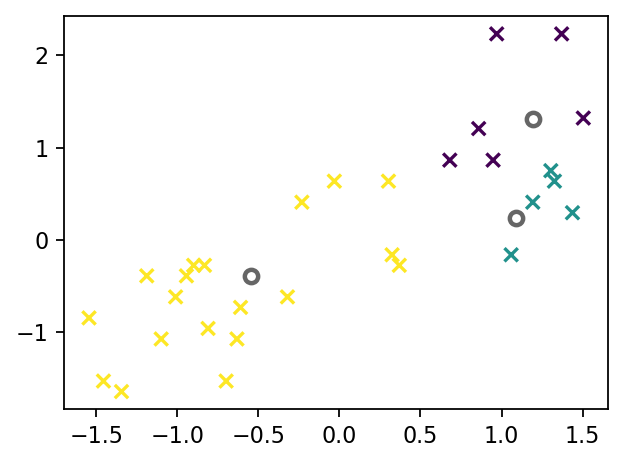

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3), dpi=160)
plt.scatter(y[:,0],y[:,1],c=cluster_ids_y, cmap='viridis', marker='x')

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='white', alpha=0.6, edgecolors='black', linewidths=2)

plt.tight_layout()
plt.show()

### Gaussian Mixture Model

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('../chap11/data/data.npy')

[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


C:\Users\Seungyun\anaconda3\envs\torch_book\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


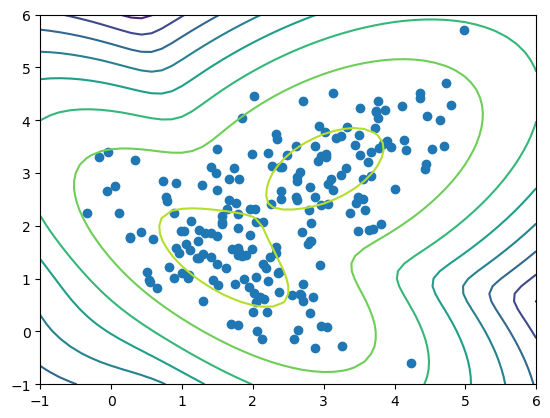

In [15]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X,Y,Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

### Self-Orginizing Map

In [16]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화

. SOM 진행종료


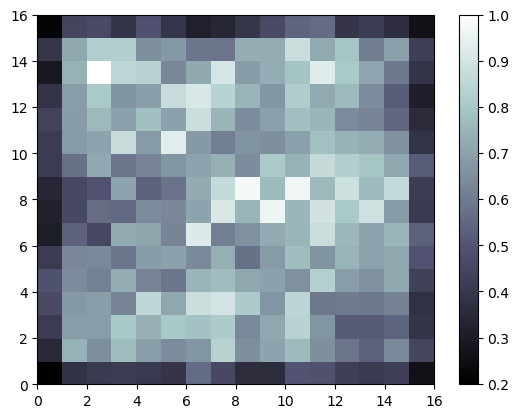

In [17]:
som = MiniSom(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화")
som.train_random(data,10000)
print('\n. SOM 진행종료')

bone()
pcolor(som.distance_map().T)
colorbar()    

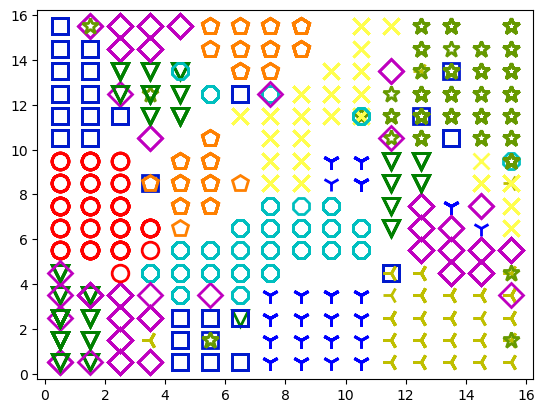

In [18]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)
show()